In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_68.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_46.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_28.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_20.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_22.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_65.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/orange_41.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_67.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_12.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/banana_37.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_1.jpg
/kaggle/input/fruit-images-for-object-detection/train_zip/train/apple_55.xml
/kaggle/input/fruit-images-for-object-detection/train_zip/train/mixed_2

In [3]:
import numpy as np
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split


In [9]:
tensorflow.random.set_seed(14)

In [74]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = '../input/fruit-images-for-object-detection/train_zip/train'

for filename in os.listdir('../input/fruit-images-for-object-detection/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        train_labels.append(filename.split('_')[0])
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,shape)
        train_images.append(img)

train_labels = pd.get_dummies(train_labels).values


train_images = np.array(train_images)

x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

[1 0 0 0]


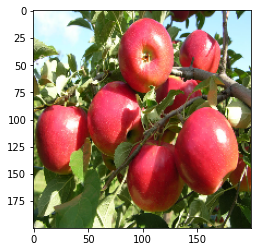

In [77]:
print(train_labels[1])

plt.imshow(train_images[1])

In [78]:
test_images=[]
shape=(200,200)
test_path="../input/fruit-images-for-object-detection/test_zip/test"
for filename in os.listdir(test_path):
    if(filename.split(".")=="jpg"):
        img=cv2.imread(os.path.join(test_path,filename))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,shape)
        test_images.append(img)
test_images=np.array(test_images)

In [93]:

from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

In [94]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)            

In [96]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

2022-10-24 03:44:02.351177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
4/4 [==============================] - 8s 2s/step - loss: 5.2859 - acc: 0.3222 - val_loss: 1.5157 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 7s 2s/step - loss: 1.9915 - acc: 0.4389 - val_loss: 1.8400 - val_acc: 0.4000
Epoch 3/50
4/4 [==============================] - 7s 2s/step - loss: 1.4188 - acc: 0.5611 - val_loss: 1.2269 - val_acc: 0.6167
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 1.2448 - acc: 0.6222 - val_loss: 1.1300 - val_acc: 0.5833
Epoch 5/50
4/4 [==============================] - 7s 2s/step - loss: 1.2699 - acc: 0.4611 - val_loss: 1.0850 - val_acc: 0.3833
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 1.0636 - acc: 0.4778 - val_loss: 0.8356 - val_acc: 0.6500
Epoch 7/50
4/4 [==============================] - 8s 2s/step - loss: 0.9226 - acc: 0.5500 - val_loss: 0.8626 - val_acc: 0.6500
Epoch 8/50
4/4 [==============================] - 7s 2s/step - loss: 0.9599 - acc: 0.6167 - val_loss: 0.9577 - 

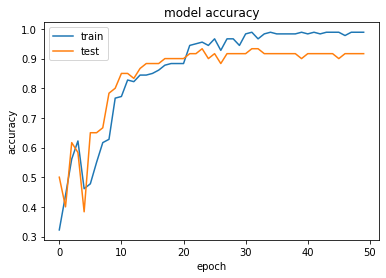

In [97]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()evaluate = model.evaluate(x_val,y_val)
print(evaluate)

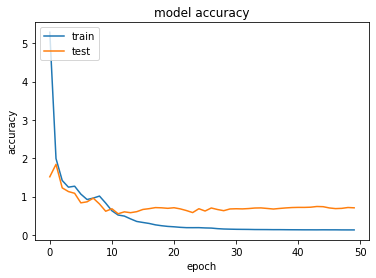

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [99]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 351ms/step - loss: 0.7061 - acc: 0.9167
[0.7061434388160706, 0.9166666865348816]
